# Import modules and useful tools

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import datetime
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Import Dataset

In [2]:
df=pd.read_csv(r"D:\Machine_LEarning\archive\US_Accidents_March23.csv")

# First data analysis

In [16]:
# It show the first Five Row
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [17]:
df.shape

(7728394, 46)

In [18]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [23]:
df.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [31]:
df_missing_values=df.isna().sum()
df_missing_values.sum()

12840498

# Convert date columns to datetime

In [33]:
df[['Start_Time']]

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
7728389,2019-08-23 18:03:25
7728390,2019-08-23 19:11:30
7728391,2019-08-23 19:00:21
7728392,2019-08-23 19:00:21


In [42]:
date_length=df['Start_Time'].str.len()
(date_length)

0          19
1          19
2          19
3          19
4          19
           ..
7728389    19
7728390    19
7728391    19
7728392    19
7728393    19
Name: Start_Time, Length: 7728394, dtype: int64

In [43]:
(date_length.value_counts())

Start_Time
19    6985228
29     682322
26      60844
Name: count, dtype: int64

In [46]:
indices=np.where([date_length == 19])[1]
indices

array([      0,       1,       2, ..., 7728391, 7728392, 7728393],
      dtype=int64)

In [47]:
df.loc[indices].sample(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3378433,A-3388316,Source2,3,2017-08-19 10:17:50,2017-08-19 11:01:42,38.953365,-94.529633,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
1899591,A-1909454,Source2,2,2019-09-12 04:06:59,2019-09-12 05:06:42,43.987228,-123.078438,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
4910516,A-4947728,Source1,2,2022-08-19 17:21:17,2022-08-19 18:40:48,33.097934,-81.013874,33.098265,-81.013885,0.023,...,False,False,False,False,False,False,Day,Day,Day,Day
4463584,A-4497407,Source1,2,2022-12-03 11:02:38,2022-12-03 12:17:38,29.831345,-95.280393,29.831373,-95.276912,0.209,...,False,False,False,False,False,False,Day,Day,Day,Day
3558228,A-3568111,Source1,3,2017-03-01 08:19:37,2017-03-01 14:19:37,32.916480,-96.742750,32.920970,-96.750090,0.527,...,False,False,False,False,False,False,Day,Day,Day,Day


In [49]:
# rows with dates length of 26
indices = np.where([date_length == 26])[1]
df.loc[indices].sample(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5383935,A-5424841,Source1,2,2022-11-23 19:28:00.000000,2022-11-23 21:03:20.000000,33.880548,-98.529028,33.878400,-98.529387,0.150,...,False,False,False,False,False,False,Night,Night,Night,Night
4063610,A-4094165,Source1,2,2022-08-16 14:18:00.000000,2022-08-16 15:33:07.000000,28.240888,-82.364804,28.242296,-82.363157,0.140,...,False,False,False,False,False,False,Day,Day,Day,Day
6383439,A-6430513,Source1,2,2021-02-21 23:47:27.000000,2021-02-22 03:33:04.000000,34.574758,-81.989089,34.581578,-81.995859,0.609,...,False,False,False,False,False,False,Night,Night,Night,Night
4552893,A-4587428,Source1,2,2022-03-01 16:15:02.000000,2022-03-01 17:33:40.000000,32.801996,-96.738334,32.801634,-96.737426,0.058,...,False,False,False,False,False,False,Day,Day,Day,Day
3976125,A-4005959,Source1,2,2022-08-23 13:07:00.000000,2022-08-23 15:07:00.000000,35.094379,-77.037052,35.094819,-77.035294,0.104,...,False,False,False,False,False,False,Day,Day,Day,Day


In [50]:
# rows with dates length of 29
indices = np.where([date_length == 29])[1]
df.loc[indices].sample(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5258074,A-5297982,Source1,2,2023-02-02 21:25:09.000000000,2023-02-03 00:00:36.000000000,42.412470,-123.412754,42.412313,-123.412761,0.011,...,False,False,False,False,False,False,Night,Night,Night,Night
4761506,A-4797631,Source1,2,2022-07-12 19:55:00.000000000,2022-07-12 20:39:00.000000000,38.557885,-77.340089,38.649538,-77.283223,7.038,...,False,False,False,False,False,False,Day,Day,Day,Day
4033475,A-4063789,Source1,2,2022-08-22 15:02:00.000000000,2022-08-22 16:21:34.000000000,34.775194,-118.418893,34.775239,-118.413503,0.306,...,False,False,False,False,False,False,Day,Day,Day,Day
4396367,A-4429634,Source1,2,2022-09-19 17:33:08.000000000,2022-09-19 19:19:12.000000000,26.261065,-81.742061,26.283663,-81.742671,1.562,...,False,False,False,False,False,False,Day,Day,Day,Day
5173469,A-5212709,Source1,2,2022-12-30 12:34:30.000000000,2022-12-30 15:33:30.000000000,38.236877,-78.967112,38.144867,-79.019216,6.959,...,False,False,False,False,False,False,Day,Day,Day,Day


In [53]:
df['Start_Time_parse']=df['Start_Time'].str[:19]
df['Start_Time_parse']=pd.to_datetime(df['Start_Time_parse'],format="%Y-%m-%d %H:%M:%S")
df[['Start_Time_parse']]

,Start_Time_parse
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
7728389,2019-08-23 18:03:25
7728390,2019-08-23 19:11:30
7728391,2019-08-23 19:00:21
7728392,2019-08-23 19:00:21


In [54]:
df['End_Time']

0          2016-02-08 11:00:00
1          2016-02-08 06:37:59
2          2016-02-08 07:19:27
3          2016-02-08 07:53:34
4          2016-02-08 08:09:07
                  ...         
7728389    2019-08-23 18:32:01
7728390    2019-08-23 19:38:23
7728391    2019-08-23 19:28:49
7728392    2019-08-23 19:29:42
7728393    2019-08-23 19:21:31
Name: End_Time, Length: 7728394, dtype: object

In [56]:
date_lengths=df['End_Time'].str.len()
date_lengths.value_counts()

End_Time
19    6985228
29     682322
26      60844
Name: count, dtype: int64

In [63]:
indices=np.where([date_lengths==19])[1]
df.loc[indices].sample(5)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_parse
2620261,A-2630133,Source2,2,2018-08-07 14:32:58,2018-08-07 15:17:46,42.986446,-85.662071,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,2018-08-07 14:32:58
2778114,A-2787991,Source2,2,2018-06-28 05:29:33,2018-06-28 05:59:18,34.036911,-81.090591,NaN,NaN,0.000,...,False,False,False,False,False,Night,Night,Day,Day,2018-06-28 05:29:33
4499808,A-4533890,Source1,2,2022-12-24 11:23:00,2022-12-24 12:54:12,28.571277,-81.372797,28.571397,-81.372799,0.008,...,False,False,False,True,False,Day,Day,Day,Day,2022-12-24 11:23:00
1876797,A-1886660,Source2,2,2019-08-31 10:35:11,2019-08-31 11:19:38,39.724380,-105.182732,NaN,NaN,1.390,...,False,False,False,False,False,Day,Day,Day,Day,2019-08-31 10:35:11
105868,A-105875,Source2,3,2016-05-03 15:31:44,2016-05-03 16:01:44,33.802834,-118.125191,NaN,NaN,0.010,...,False,False,False,False,False,Day,Day,Day,Day,2016-05-03 15:31:44


In [64]:
# rows with dates length of 26
indices = np.where([date_lengths == 26])[1]
df.loc[indices].sample(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_parse
5323072,A-5363508,Source1,2,2022-04-13 14:51:31.000000,2022-04-13 15:10:31.000000,39.520150,-76.199123,39.530570,-76.181853,1.169,...,False,False,False,False,False,Day,Day,Day,Day,2022-04-13 14:51:31
4655862,A-4691180,Source1,2,2022-06-21 07:48:00.000000,2022-06-21 08:14:30.000000,28.081087,-82.739341,28.067265,-82.738982,0.955,...,False,False,False,False,False,Day,Day,Day,Day,2022-06-21 07:48:00
5672444,A-5715139,Source1,2,2021-04-20 15:33:59.000000,2021-04-20 16:57:36.000000,40.734642,-74.106848,40.734733,-74.109814,0.155,...,False,False,False,False,False,Day,Day,Day,Day,2021-04-20 15:33:59
3976679,A-4006518,Source1,2,2023-02-12 20:49:00.000000,2023-02-12 23:04:52.000000,40.309326,-79.598694,40.310607,-79.601205,0.159,...,False,False,False,True,False,Night,Night,Night,Night,2023-02-12 20:49:00
5671892,A-5714586,Source1,2,2021-11-13 14:44:30.000000,2021-11-13 16:50:21.000000,38.839950,-77.105837,38.842093,-77.107984,0.188,...,True,False,False,True,False,Day,Day,Day,Day,2021-11-13 14:44:30


In [65]:
# rows with dates length of 29
indices = np.where([date_lengths == 29])[1]
df.loc[indices].sample(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_parse
5295899,A-5336101,Source1,2,2022-03-11 04:02:25.000000000,2022-03-11 05:46:14.000000000,40.778678,-74.475366,40.776107,-74.477117,0.200,...,False,False,False,False,False,Night,Night,Night,Night,2022-03-11 04:02:25
5221220,A-5260832,Source1,2,2022-03-07 18:04:20.000000000,2022-03-07 19:38:50.000000000,40.784479,-73.941990,40.779259,-73.943560,0.370,...,False,True,False,False,False,Night,Day,Day,Day,2022-03-07 18:04:20
4786625,A-4822953,Source1,2,2022-12-06 08:30:00.000000000,2022-12-06 09:09:30.000000000,39.319353,-77.019864,39.326466,-77.016227,0.529,...,False,False,False,False,False,Day,Day,Day,Day,2022-12-06 08:30:00
6254687,A-6300783,Source1,2,2021-08-05 11:00:00.000000000,2021-08-05 11:21:00.000000000,34.002971,-117.951255,34.010653,-117.976237,1.526,...,False,False,False,False,False,Day,Day,Day,Day,2021-08-05 11:00:00
6172443,A-6218090,Source1,2,2021-04-10 11:45:18.000000000,2021-04-10 12:15:44.000000000,34.288707,-118.408361,34.283286,-118.402634,0.497,...,False,False,False,False,False,Day,Day,Day,Day,2021-04-10 11:45:18


In [68]:
# slice all "End_Time" column dates to length of 19
df["End_Time_parsed"] = df["End_Time"].str[:19]

# parse "Start_Time" column into datetime
df["End_Time_parsed"] = pd.to_datetime(df["End_Time_parsed"], format="%Y-%m-%d %H:%M:%S")
df["End_Time_parsed"]


0         2016-02-08 11:00:00
1         2016-02-08 06:37:59
2         2016-02-08 07:19:27
3         2016-02-08 07:53:34
4         2016-02-08 08:09:07
                  ...        
7728389   2019-08-23 18:32:01
7728390   2019-08-23 19:38:23
7728391   2019-08-23 19:28:49
7728392   2019-08-23 19:29:42
7728393   2019-08-23 19:21:31
Name: End_Time_parsed, Length: 7728394, dtype: datetime64[ns]

In [70]:
# weather timestamp
df["Weather_Timestamp"]

0          2016-02-08 05:58:00
1          2016-02-08 05:51:00
2          2016-02-08 06:56:00
3          2016-02-08 07:38:00
4          2016-02-08 07:53:00
                  ...         
7728389    2019-08-23 17:53:00
7728390    2019-08-23 18:53:00
7728391    2019-08-23 18:53:00
7728392    2019-08-23 18:51:00
7728393    2019-08-23 20:50:00
Name: Weather_Timestamp, Length: 7728394, dtype: object

In [71]:
# check for weather timestamp different lengths
date_lengths = df["Weather_Timestamp"].str.len()
date_lengths.value_counts()

Weather_Timestamp
19.0    7608166
Name: count, dtype: int64

In [72]:
# parse timestamp to datetime
df["Weather_Timestamp_parsed"] = pd.to_datetime(df["Weather_Timestamp"], format="%Y-%m-%d %H:%M:%S")
df["Weather_Timestamp_parsed"]

0         2016-02-08 05:58:00
1         2016-02-08 05:51:00
2         2016-02-08 06:56:00
3         2016-02-08 07:38:00
4         2016-02-08 07:53:00
                  ...        
7728389   2019-08-23 17:53:00
7728390   2019-08-23 18:53:00
7728391   2019-08-23 18:53:00
7728392   2019-08-23 18:51:00
7728393   2019-08-23 20:50:00
Name: Weather_Timestamp_parsed, Length: 7728394, dtype: datetime64[ns]

## Add more dates columns

In [74]:
df["Hour"] = df["Start_Time_parse"].dt.hour + 1 
df["Day"] = df["Start_Time_parse"].dt.weekday + 1
df["Month"] = df["Start_Time_parse"].dt.month 
df["Year"] = df["Start_Time_parse"].dt.year 
df["Duration"] = df["End_Time_parsed"] - df["Start_Time_parse"]
df[["Hour", "Day", "Month", "Year", "Duration"]]

,Hour,Day,Month,Year,Duration
0,6,1,2,2016,0 days 05:14:00
1,7,1,2,2016,0 days 00:30:00
2,7,1,2,2016,0 days 00:30:00
3,8,1,2,2016,0 days 00:30:00
4,8,1,2,2016,0 days 00:30:00
...,...,...,...,...,...
7728389,19,5,8,2019,0 days 00:28:36
7728390,20,5,8,2019,0 days 00:26:53
7728391,20,5,8,2019,0 days 00:28:28
7728392,20,5,8,2019,0 days 00:29:21


In [76]:
# make sure values make sense
df[["Hour", "Day", "Month", "Year", "Duration"]].describe()

,Hour,Day,Month,Year,Duration
count,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7728394
mean,1.332857e+01,3.594364e+00,6.706355e+00,2.019908e+03,0 days 07:24:25.257412342
std,5.464796e+00,1.806053e+00,3.641262e+00,1.914670e+00,9 days 09:12:17.553315022
min,1.000000e+00,1.000000e+00,1.000000e+00,2.016000e+03,0 days 00:01:13
25%,9.000000e+00,2.000000e+00,3.000000e+00,2.018000e+03,0 days 00:31:30
50%,1.400000e+01,4.000000e+00,7.000000e+00,2.020000e+03,0 days 01:14:50
75%,1.800000e+01,5.000000e+00,1.000000e+01,2.022000e+03,0 days 02:05:09
max,2.400000e+01,7.000000e+00,1.200000e+01,2.023000e+03,1953 days 10:19:00


## Convert US measurement units into EU measurement units

In [78]:
# data before conversion
df[["Distance(mi)", "Visibility(mi)", "Pressure(in)", "Wind_Speed(mph)", "Precipitation(in)", "Temperature(F)", "Wind_Chill(F)"]]

,Distance(mi),Visibility(mi),Pressure(in),Wind_Speed(mph),Precipitation(in),Temperature(F),Wind_Chill(F)
0,0.010,10.0,29.68,NaN,0.02,36.9,NaN
1,0.010,10.0,29.65,NaN,0.00,37.9,NaN
2,0.010,10.0,29.67,3.5,NaN,36.0,33.3
3,0.010,9.0,29.64,4.6,NaN,35.1,31.0
4,0.010,6.0,29.65,3.5,NaN,36.0,33.3
...,...,...,...,...,...,...,...
7728389,0.543,10.0,28.92,13.0,0.00,86.0,86.0
7728390,0.338,10.0,29.39,6.0,0.00,70.0,70.0
7728391,0.561,10.0,29.74,10.0,0.00,73.0,73.0
7728392,0.772,10.0,29.62,8.0,0.00,71.0,71.0


In [80]:
# make sure all units columns are numbers
df[["Distance(mi)", "Visibility(mi)", "Pressure(in)", "Wind_Speed(mph)", "Precipitation(in)", "Temperature(F)", "Wind_Chill(F)"]].dtypes

Distance(mi)         float64
Visibility(mi)       float64
Pressure(in)         float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Temperature(F)       float64
Wind_Chill(F)        float64
dtype: object

In [82]:
# convert distance from miles to kilometers.
df["Distance(km)"] = df["Distance(mi)"] * 1.609344

# convert visibility from miles to kilometers.
df["Visibility(km)"] = df["Visibility(mi)"] * 1.609344

# convert pressure in the air from inches to millimeter.
df["Pressure(mm)"] = df["Pressure(in)"] * 25.4

# convert wind speed from miles per hour to kilometers per hour.
df["Wind_Speed(kmh)"] = df["Wind_Speed(mph)"] * 1.609344

# convert precipitation from inches to millimeter.
df["Precipitation(mm)"] = df["Precipitation(in)"] * 25.4

# convert temperature from fahrenheit to celsius
df["Temperature(C)"] = (df["Temperature(F)"] - 32) * 5/9

# convert wind chill fahrenheit to celsius
df["Wind_Chill(C)"] = (df["Wind_Chill(F)"] - 32) * 5/9

In [83]:
# data after conversion
df[["Distance(km)", "Visibility(km)", "Pressure(mm)", "Wind_Speed(kmh)", "Precipitation(mm)", "Temperature(C)", "Wind_Chill(C)"]]

,Distance(km),Visibility(km),Pressure(mm),Wind_Speed(kmh),Precipitation(mm),Temperature(C),Wind_Chill(C)
0,0.016093,16.093440,753.872,NaN,0.508,2.722222,NaN
1,0.016093,16.093440,753.110,NaN,0.000,3.277778,NaN
2,0.016093,16.093440,753.618,5.632704,NaN,2.222222,0.722222
3,0.016093,14.484096,752.856,7.402982,NaN,1.722222,-0.555556
4,0.016093,9.656064,753.110,5.632704,NaN,2.222222,0.722222
...,...,...,...,...,...,...,...
7728389,0.873874,16.093440,734.568,20.921472,0.000,30.000000,30.000000
7728390,0.543958,16.093440,746.506,9.656064,0.000,21.111111,21.111111
7728391,0.902842,16.093440,755.396,16.093440,0.000,22.777778,22.777778
7728392,1.242414,16.093440,752.348,12.874752,0.000,21.666667,21.666667


In [84]:
# create new dataset
accidents_new = df

In [85]:
# remove old us measurement units
accidents_new.drop(["Distance(mi)", "Visibility(mi)", "Pressure(in)", "Wind_Speed(mph)", "Precipitation(in)", "Temperature(F)", "Wind_Chill(F)"], axis=1, inplace=True)

In [88]:
# rename "Start/End_Time_parsed" to "Start/End_Time" and remove old columns
accidents_new["Start_Time"] = df["Start_Time_parse"]
accidents_new["End_Time"] = df["End_Time_parsed"]
accidents_new["Weather_Timestamp"] = df["Weather_Timestamp_parsed"]
accidents_new.drop(["Start_Time_parse", "End_Time_parsed", "Weather_Timestamp_parsed"], axis=1, inplace=True)

In [89]:
# remove unused columns
accidents_new.drop(["Source", "Start_Lat", "Start_Lng", "End_Lat", "End_Lng", "Airport_Code"], axis=1, inplace=True)

In [90]:
# show new dataset columns
accidents_new.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Weather_Timestamp', 'Humidity(%)', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Hour',
       'Day', 'Month', 'Year', 'Duration', 'Distance(km)', 'Visibility(km)',
       'Pressure(mm)', 'Wind_Speed(kmh)', 'Precipitation(mm)',
       'Temperature(C)', 'Wind_Chill(C)'],
      dtype='object')

In [91]:
# new info
accidents_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 45 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   ID                     object         
 1   Severity               int64          
 2   Start_Time             datetime64[ns] 
 3   End_Time               datetime64[ns] 
 4   Description            object         
 5   Street                 object         
 6   City                   object         
 7   County                 object         
 8   State                  object         
 9   Zipcode                object         
 10  Country                object         
 11  Timezone               object         
 12  Weather_Timestamp      datetime64[ns] 
 13  Humidity(%)            float64        
 14  Wind_Direction         object         
 15  Weather_Condition      object         
 16  Amenity                bool           
 17  Bump                   bool           
 18  Cr

In [92]:
accidents_new

,ID,Severity,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,...,Month,Year,Duration,Distance(km),Visibility(km),Pressure(mm),Wind_Speed(kmh),Precipitation(mm),Temperature(C),Wind_Chill(C)
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,...,2,2016,0 days 05:14:00,0.016093,16.093440,753.872,NaN,0.508,2.722222,NaN
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,...,2,2016,0 days 00:30:00,0.016093,16.093440,753.110,NaN,0.000,3.277778,NaN
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,...,2,2016,0 days 00:30:00,0.016093,16.093440,753.618,5.632704,NaN,2.222222,0.722222
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,...,2,2016,0 days 00:30:00,0.016093,14.484096,752.856,7.402982,NaN,1.722222,-0.555556
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,...,2,2016,0 days 00:30:00,0.016093,9.656064,753.110,5.632704,NaN,2.222222,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,...,8,2019,0 days 00:28:36,0.873874,16.093440,734.568,20.921472,0.000,30.000000,30.000000
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,...,8,2019,0 days 00:26:53,0.543958,16.093440,746.506,9.656064,0.000,21.111111,21.111111
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,...,8,2019,0 days 00:28:28,0.902842,16.093440,755.396,16.093440,0.000,22.777778,22.777778
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,...,8,2019,0 days 00:29:21,1.242414,16.093440,752.348,12.874752,0.000,21.666667,21.666667


In [96]:
df=pd.read_csv(r"D:\Machine_LEarning\archive\US_Accidents_March23.csv")

In [97]:
df.sample(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
453492,A-453505,Source3,3,2017-05-09 08:53:47,2017-05-09 09:23:33,47.315151,-122.297768,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
441073,A-441086,Source2,3,2017-05-22 14:58:37,2017-05-22 15:43:22,32.694931,-117.133797,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [98]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [99]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

<Axes: >

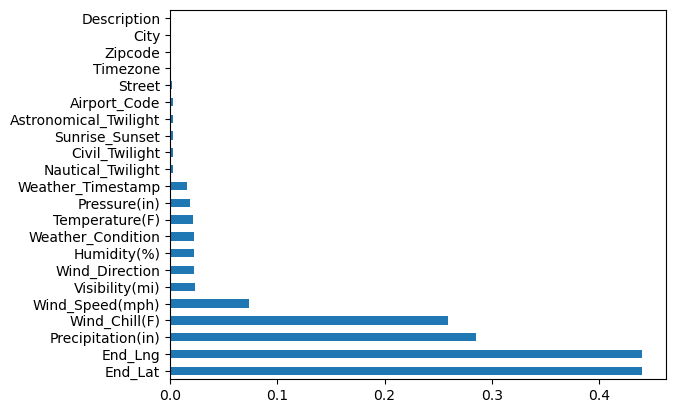

In [100]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')


# Exploratory Analysis and Visualization¶


- City

In [101]:
cities = df.City.unique()
len(cities)

13679

In [102]:
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

<Axes: ylabel='City'>

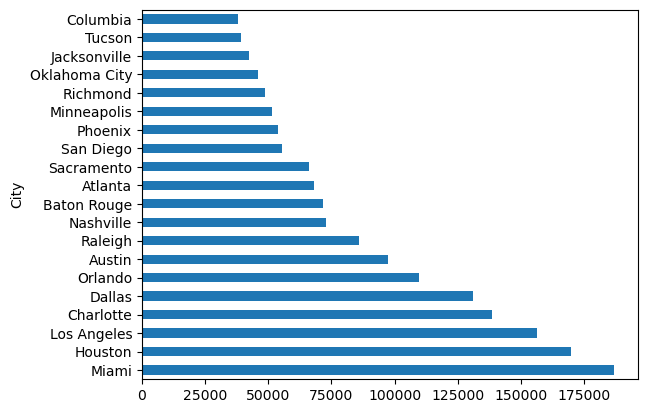

In [103]:
cities_by_accident[:20].plot(kind='barh')


In [104]:

accidents_in_new_york = len(df[df['City'] == 'New York'])


# Print the result
print(f"Number of accidents in New York City: {accidents_in_new_york}")

Number of accidents in New York City: 21699


In [105]:
high_accident_cities = cities_by_accident[cities_by_accident >= 10000]
low_accident_cities = cities_by_accident[cities_by_accident <10000]

In [106]:
len(high_accident_cities) / len(cities)

0.007675999707580964

In [107]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: xlabel='count', ylabel='Count'>

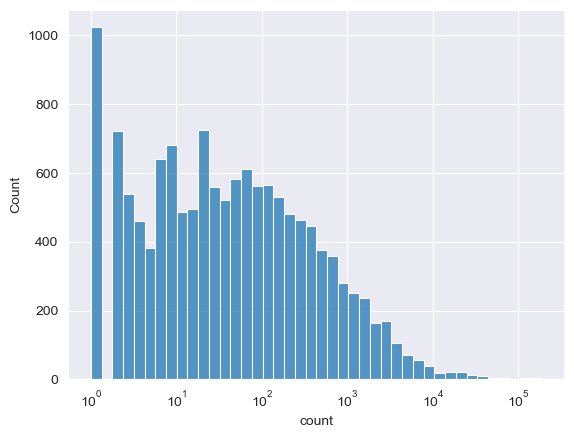

In [108]:
sns.histplot(cities_by_accident, log_scale=True)


In [109]:
len(df.State.unique())

49

In [110]:
df.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [111]:
df.Start_Time


0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [112]:
df['Start_Time'] = df['Start_Time'].str.replace(r'\.\d{9}$', '', regex=True)


In [113]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [114]:
df['Start_Time']


0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

<Axes: xlabel='Start_Time'>

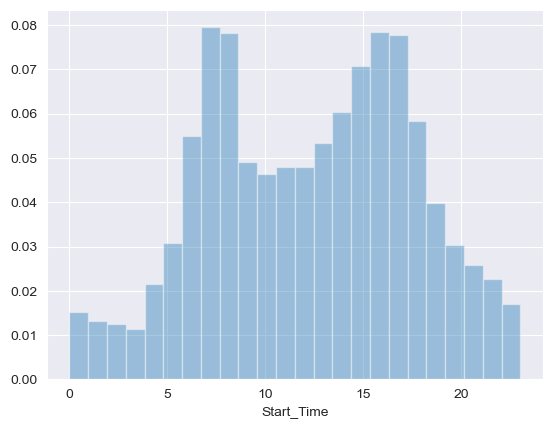

In [115]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

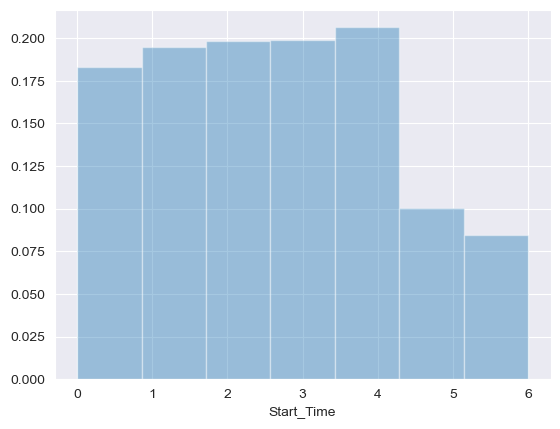

In [116]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

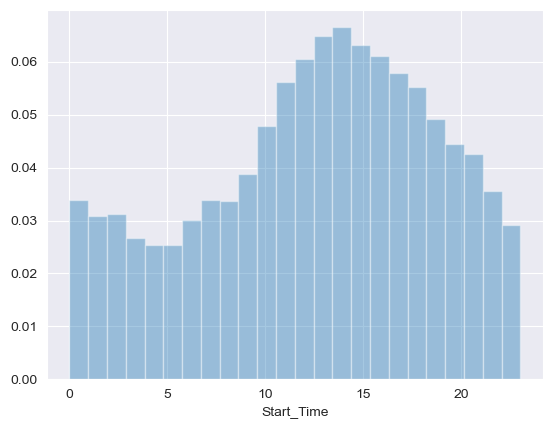

In [118]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

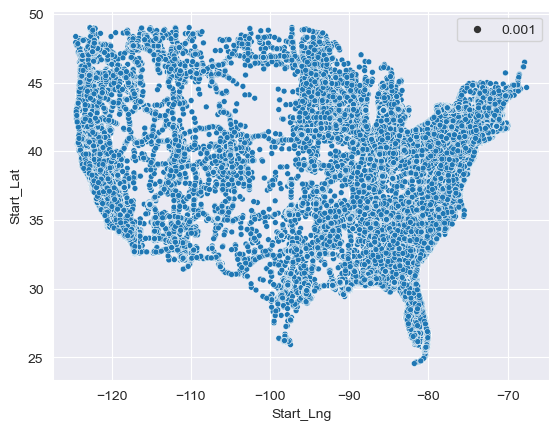

In [119]:
sample_df = df.sample(int(0.1 *len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [120]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [124]:
from folium.plugins import HeatMap


In [125]:
sample_df = df.sample(int(0.1 * len(df)))
lat_lng_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [126]:
map = folium.Map()
HeatMap(lat_lng_pairs).add_to(map)
map

NameError: name 'folium' is not defined

In [127]:
df['Temperature(F)']


0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
           ... 
7728389    86.0
7728390    70.0
7728391    73.0
7728392    71.0
7728393    79.0
Name: Temperature(F), Length: 7728394, dtype: float64

<Axes: xlabel='Temperature(F)', ylabel='Count'>

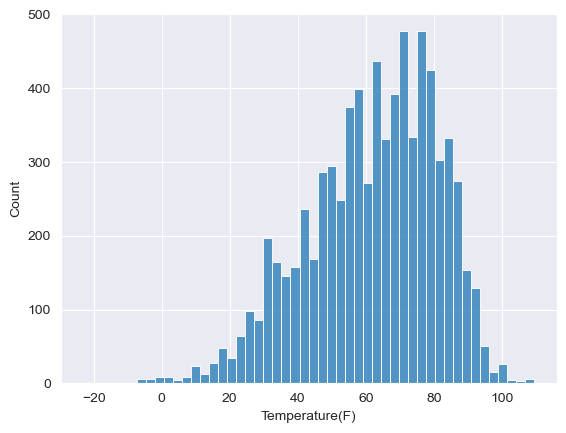

In [128]:
sample_df = df.sample(int(0.001 *len(df)))
sns.histplot(sample_df['Temperature(F)'])

# Weather_Condition

In [129]:
weather_by_acc = df['Weather_Condition'].value_counts()
weather_by_acc

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

<Axes: ylabel='Weather_Condition'>

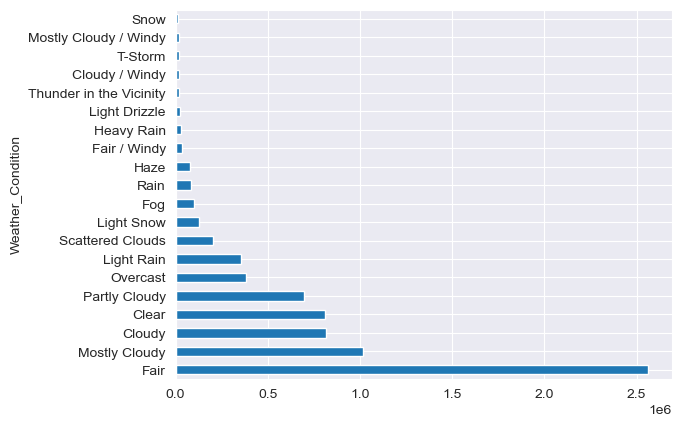

In [130]:
weather_by_acc[:20].plot(kind='barh')
